## Business Problem

The goal is to unravel the critical factors influencing graduate admissions for Indian students aspiring to join IVY league colleges. By employing advanced analytical techniques, the aim is to identify the interrelationships among various admission criteria. Additionally, the analysis will enable the development of a predictive model that can assess an individual's likelihood of admission based on a set of key variables. This valuable insight will not only enhance Jamboree's understanding of the nuanced dynamics of graduate admissions but also empower prospective students by providing personalized chances of admission, aligning with Jamboree's commitment to optimizing success with minimal effort for students pursuing education abroad.

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [210]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')

### Pre-processing

In [211]:
df.drop('Serial No.', axis = 1, inplace = True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [212]:
s_cols=[]
for i in df.columns:
    x=i.strip()
    s_cols.append(x)
df.columns = s_cols

In [213]:
df.shape

(500, 8)

In [214]:
df.isnull().sum() # checking for null values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [215]:
# Summary statistics
df.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# EDA

### Univariate Analysis

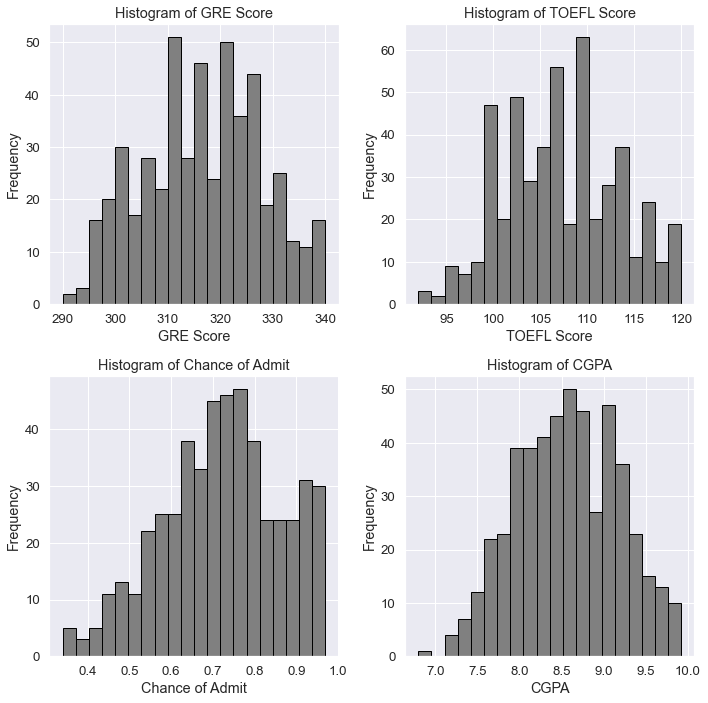

In [520]:
# Univariate EDA for numerical variables
numerical_columns = ['GRE Score', 'TOEFL Score', 'Chance of Admit', 'CGPA']

# Create subplots for histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Plot histograms for each numerical variable
for i, column in enumerate(numerical_columns):
    axs[i].hist(df[column], bins=20, edgecolor='black', color='grey')
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

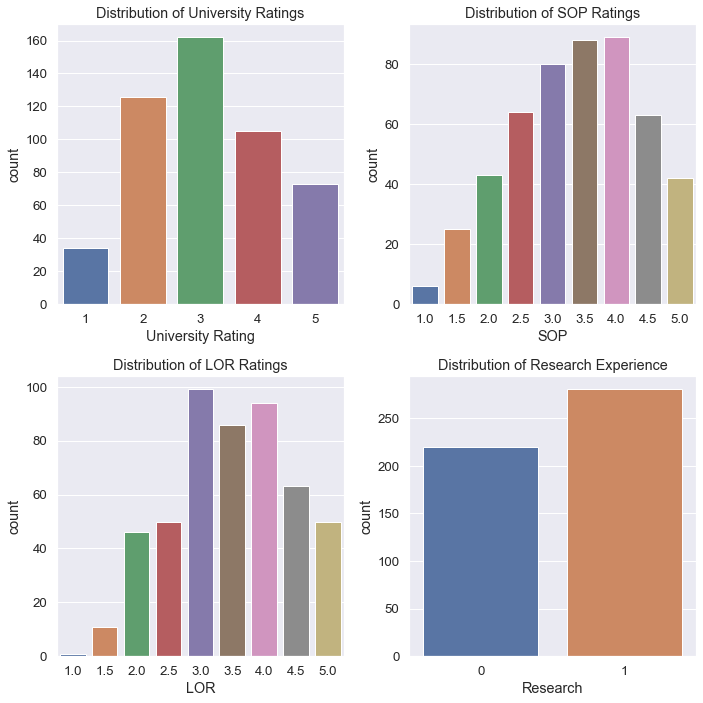

In [521]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Bar plot for University Rating
sns.countplot(x='University Rating', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of University Ratings')

# Bar plot for SOP
sns.countplot(x='SOP', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of SOP Ratings')

# Bar plot for LOR
sns.countplot(x='LOR', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of LOR Ratings')

# Bar plot for Research
sns.countplot(x='Research', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Research Experience')

plt.tight_layout()
plt.show()

## Bivariate Analysis

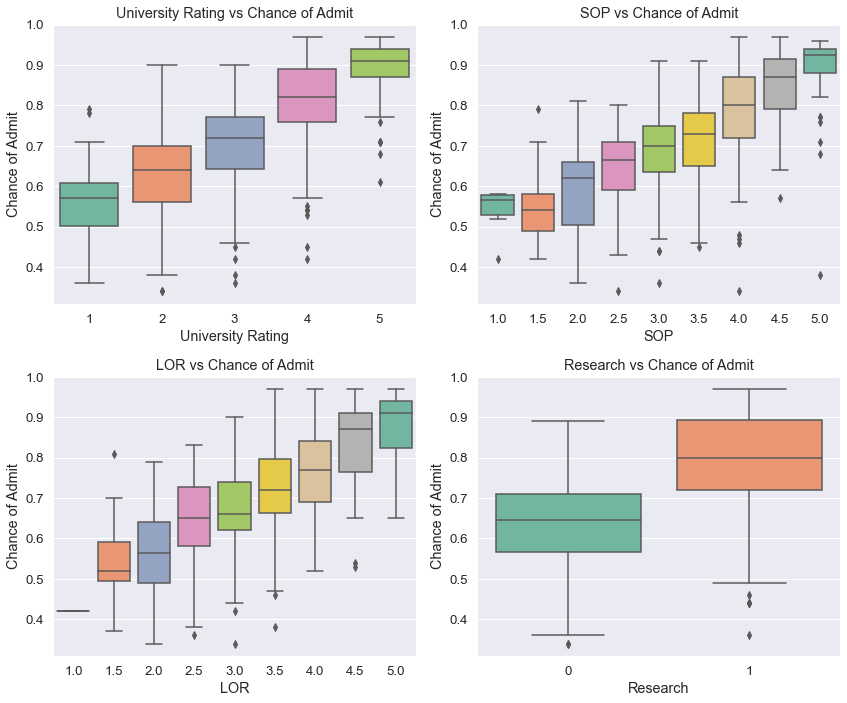

In [505]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Boxplot for University Rating
sns.boxplot(x='University Rating', y='Chance of Admit', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('University Rating vs Chance of Admit')

# Boxplot for SOP
sns.boxplot(x='SOP', y='Chance of Admit', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('SOP vs Chance of Admit')

# Boxplot for LOR
sns.boxplot(x='LOR', y='Chance of Admit', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('LOR vs Chance of Admit')

# Boxplot for Research
sns.boxplot(x='Research', y='Chance of Admit', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Research vs Chance of Admit')

plt.tight_layout()
plt.show()


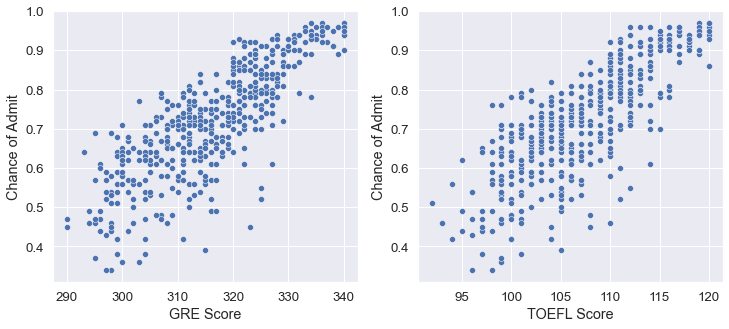

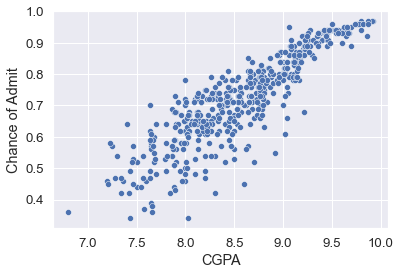

In [506]:
# check relation bw continuous variables & target variable
target ='Chance of Admit'
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x=numerical_columns[0], y=target, data=df, ax=axs[0])
sns.scatterplot(x=numerical_columns[1], y=target, data=df, ax=axs[1])
plt.show()
sns.scatterplot(x=numerical_columns[3], y=target, data=df)
plt.show()

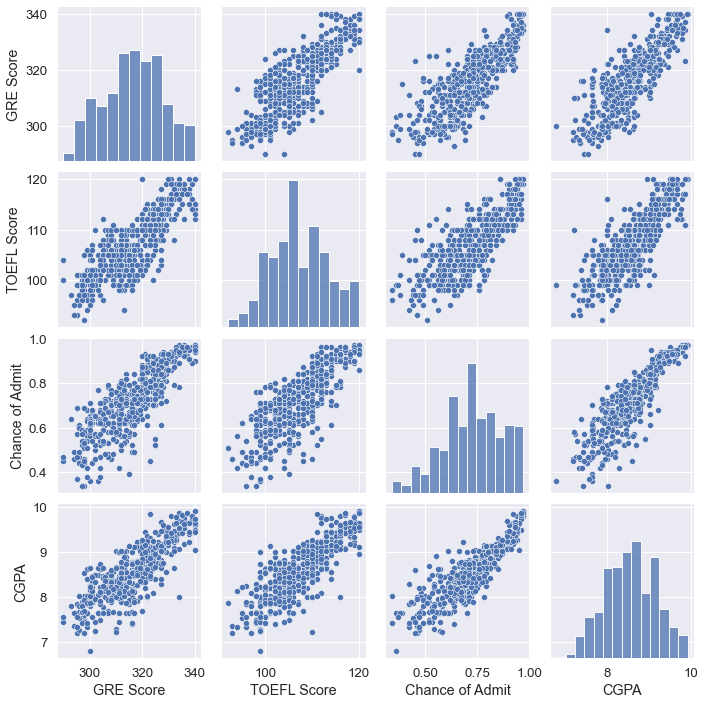

In [291]:
sns.pairplot(df[numerical_columns])
plt.show()

<Axes: >

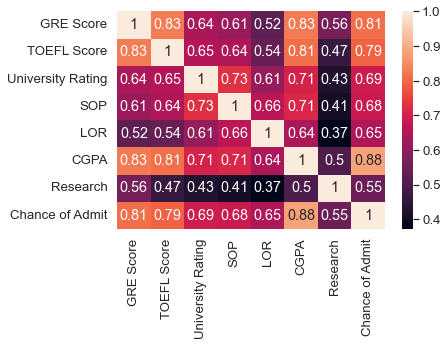

In [522]:

sns.heatmap(df.corr(), annot=True)

## Model Building

In [223]:
import statsmodels.api as sm

In [224]:
X = df.drop('Chance of Admit', axis=1)  # Independent variables
y = df['Chance of Admit']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          8.21e-180
Time:                        18:57:10   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

- The R-squared value is 0.822, which indicates that the model explains 82.2% of the variance in the chance of admit. This is a relatively high R-squared value, which suggests that the model fits the data well.
- The F-statistic is highly significant (p-value < 0.0001), which means that the model is statistically significant. This means that the model is able to reject the null hypothesis that all of the regression coefficients are equal to zero.
- The coefficients for GRE Score, TOEFL Score, CGPA, and Research are all positive and statistically significant. This means that these variables are all positively associated with the chance of admit. In other words, as the values of these variables increase, the chance of admit also increases.
- The coefficients for University Rating and SOP are not statistically significant. This means that there is not enough evidence to conclude that these variables are related to the chance of admit.
- The coefficient for LOR is positive and statistically significant. This means that there is a positive relationship between the quality of the letter of recommendation and the chance of admit.
- The condition number is large, which suggests that the regression coefficients may be unstable and unreliable. This could be a sign of multicollinearity or other numerical problems.

### Let's Check for feature Importance

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

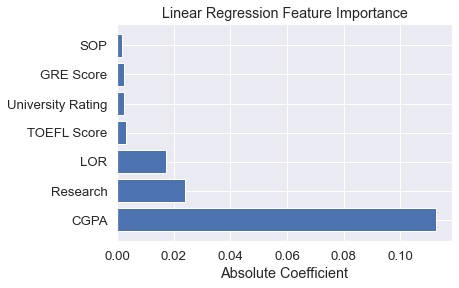

In [523]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance
plt.barh(feature_importance_df['Feature'], feature_importance_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression Feature Importance')
plt.show()

### Target Encoding for Categorical  Variables

In [524]:
# Calculate the mean of the target variable for each category
t_df = df.copy()
means = t_df.groupby('University Rating')['Chance of Admit'].mean()
t_df['University Rating'] = t_df['University Rating'].map(means)

In [525]:
means = t_df.groupby('SOP')['Chance of Admit'].mean()
t_df['SOP'] = t_df['SOP'].map(means)

means = t_df.groupby('LOR')['Chance of Admit'].mean()
t_df['LOR'] = t_df['LOR'].map(means)

means = t_df.groupby('Research')['Chance of Admit'].mean()
t_df['Research'] = t_df['Research'].map(means)

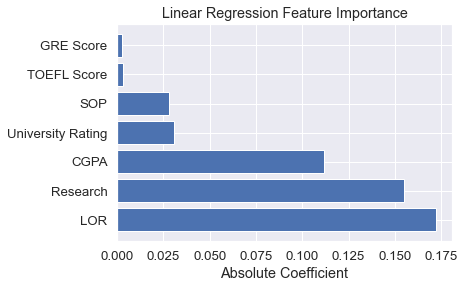

In [526]:
X = t_df.drop('Chance of Admit', axis=1)
y = t_df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_importance_t_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_t_df['Absolute Coefficient'] = np.abs(feature_importance_t_df['Coefficient'])
feature_importance_t_df = feature_importance_t_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance
plt.barh(feature_importance_t_df['Feature'], feature_importance_t_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression Feature Importance')
plt.show()

In [237]:
X = df.drop('Chance of Admit', axis=1)  # Independent variables
y = df['Chance of Admit']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          8.21e-180
Time:                        19:23:46   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.104    -12.232      0.000      -1.481      -1.071
GRE Score             0.0019      0.001      3.700      0.000       0.001       0.003
TOEFL Score           0.0028      0.001      3.184      0.002       0.001       0.004
University Rating     0.0059      0.004      1.563      0.119      -0.002       0.013
SOP                   0.0016      0.005      0.348      0.728      -0.007       0.011
LOR                   0.0169      0.004      4.074      0.000       0.009       0.025
CGPA                  0.1184      0.010     12.198      0.000       0.099       0.137
Research              0.0243      0.007      3.680      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The problem still remains

### Lets see after feature scaling


MinMax Scaling

In [527]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns you want to scale
columns_to_scale = df.columns

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Apply min-max scaling to the selected columns
m_df = df.copy()  # Creating a copy to avoid modifying the original DataFrame
m_df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Now m_df contains the scaled values


Standard Scaling

In [528]:
from sklearn.preprocessing import StandardScaler

# Select the columns you want to scale
columns_to_scale = df.columns

# Create a StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the selected columns
s_df = df.copy()  # Creating a copy to avoid modifying the original DataFrame
s_df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


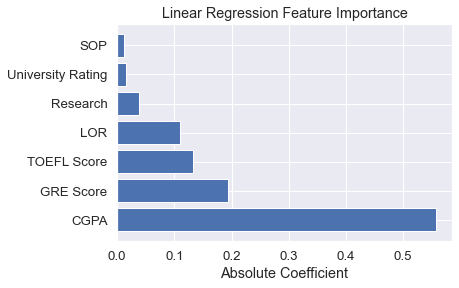

In [529]:
X = m_df.drop('Chance of Admit', axis=1)
y = m_df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_importance_m_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_m_df['Absolute Coefficient'] = np.abs(feature_importance_m_df['Coefficient'])
feature_importance_m_df = feature_importance_m_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance
plt.barh(feature_importance_m_df['Feature'], feature_importance_m_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression Feature Importance')
plt.show()

There seems to be dramatic change in the coefficient value and feature rankings have also changed
- CGPA appears to have the strongest positive relationship with the chance of admit, as it has the highest absolute coefficient value.
- GRE Score and TOEFL Score also have relatively strong positive relationships with the chance of admit.
- SOP, University Rating, and Letter of Recommendation (LOR) have weaker relationships with the chance of admit, as their coefficient values are lower.
- SOP and University Rating even have coefficients close to zero, which suggests that they may not have a statistically significant relationship with the chance of admit in this model.

<Axes: >

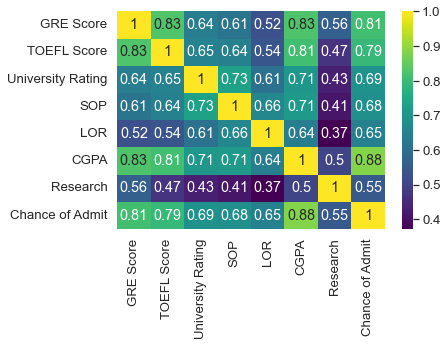

In [530]:
sns.set(font_scale=1.2)
sns.heatmap(m_df.corr(), cmap="viridis", annot=True)

In [305]:
import statsmodels.api as sm

In [531]:
X = m_df.drop('Chance of Admit', axis=1)  # Independent variables
y = m_df['Chance of Admit']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          8.21e-180
Time:                        23:52:34   Log-Likelihood:                 470.37
No. Observations:                 500   AIC:                            -924.7
Df Residuals:                     492   BIC:                            -891.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0130      0.014      0.902      0.367      -0.015       0.041
GRE Score             0.1475      0.040      3.700      0.000       0.069       0.226
TOEFL Score           0.1235      0.039      3.184      0.002       0.047       0.200
University Rating     0.0377      0.024      1.563      0.119      -0.010       0.085
SOP                   0.0101      0.029      0.348      0.728      -0.047       0.067
LOR                   0.1070      0.026      4.074      0.000       0.055       0.159
CGPA                  0.5863      0.048     12.198      0.000       0.492       0.681
Research              0.0386      0.010      3.680      0.000       0.018       0.059
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see a significant reduction in condition number

### Lets check for Standard Scaling


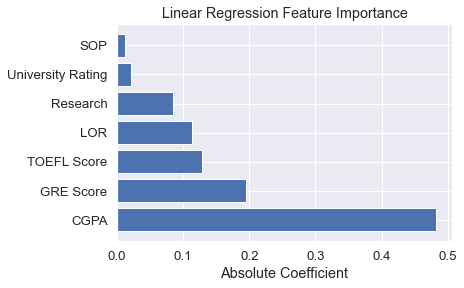

In [532]:
X = s_df.drop('Chance of Admit', axis=1)
y = s_df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_importance_s_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_s_df['Absolute Coefficient'] = np.abs(feature_importance_s_df['Coefficient'])
feature_importance_s_df = feature_importance_s_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance
plt.barh(feature_importance_s_df['Feature'], feature_importance_s_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression Feature Importance')
plt.show()

In [309]:
X = s_df.drop('Chance of Admit', axis=1)  # Independent variables
y = s_df['Chance of Admit']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          8.21e-180
Time:                        20:37:42   Log-Likelihood:                -278.12
No. Observations:                 500   AIC:                             572.2
Df Residuals:                     492   BIC:                             605.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.175e-16      0.019  -1.67e-14      1.000      -0.037       0.037
GRE Score             0.1487      0.040      3.700      0.000       0.070       0.228
TOEFL Score           0.1197      0.038      3.184      0.002       0.046       0.194
University Rating     0.0481      0.031      1.563      0.119      -0.012       0.109
SOP                   0.0111      0.032      0.348      0.728      -0.052       0.074
LOR                   0.1105      0.027      4.074      0.000       0.057       0.164
CGPA                  0.5073      0.042     12.198      0.000       0.426       0.589
Research              0.0856      0.023      3.680      0.000       0.040       0.131
==============================================================================
Omnibus:                      112.770   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.104
Skew:                          -1.160   Prob(JB):                     1.22e-57
Kurtosis:                       5.684   Cond. No.                         5.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ridge Regression

In [422]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

For MinMax Scaled data

In [338]:
X = m_df.drop('Chance of Admit', axis=1)  # Independent variables
y = m_df['Chance of Admit']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [339]:

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')


Mean Squared Error (Ridge): 0.009471258558650435


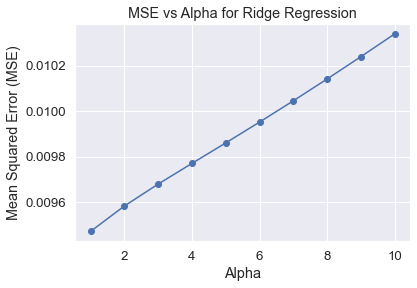

In [313]:
# Define a range of alpha values
alpha_values = np.arange(1, 11)

# Initialize an empty list to store MSE values
mse_values = []

# Loop over alpha values
for alpha in alpha_values:
    # Create and fit Ridge model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Make predictions
    y_pred_ridge = ridge_model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred_ridge)
    
    # Append MSE to the list
    mse_values.append(mse)

# Plot the change in MSE with different alpha values
plt.plot(alpha_values, mse_values, marker='o')
plt.title('MSE vs Alpha for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

For StandardScale data

In [314]:
X = s_df.drop('Chance of Admit', axis=1)  # Independent variables
y = s_df['Chance of Admit']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge_model = Ridge(alpha=1)  # the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (Ridge): {mse_ridge}')

Mean Squared Error (Ridge): 0.18638942803788974


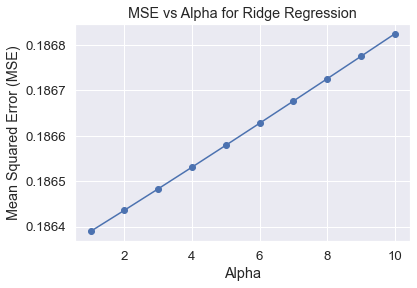

In [273]:
# Define a range of alpha values
alpha_values = np.arange(1, 11)

# Initialize an empty list to store MSE values
mse_values = []

# Loop over alpha values
for alpha in alpha_values:
    # Create and fit Ridge model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)

    # Make predictions
    y_pred_ridge = ridge_model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred_ridge)
    
    # Append MSE to the list
    mse_values.append(mse)

# Plot the change in MSE with different alpha values
plt.plot(alpha_values, mse_values, marker='o')
plt.title('MSE vs Alpha for Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

The MSE seems to better for minmax scaled data

### Lasso Regression

In [318]:
X = m_df.drop('Chance of Admit', axis=1)  # Independent variables
y = m_df['Chance of Admit']  # Dependent variable

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # the alpha parameter
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

In [320]:
# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso): {mse_lasso}')


Mean Squared Error (Lasso): 0.051897784391534404


In [300]:
X = s_df.drop('Chance of Admit', axis=1)  # Independent variables
y = s_df['Chance of Admit']  # Dependent variable

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # the alpha parameter
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Mean Squared Error (Lasso): {mse_lasso}')

Mean Squared Error (Lasso): 0.051897784391534404


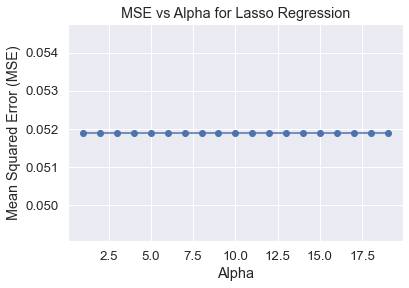

In [321]:
# Define a range of alpha values
alpha_values = np.arange(1, 20)

# Initialize an empty list to store MSE values
mse_values = []

# Loop over alpha values
for alpha in alpha_values:
    # Create and fit Lasso model
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    # Make predictions
    y_pred_lasso = lasso_model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred_lasso)
    
    # Append MSE to the list
    mse_values.append(mse)

# Plot the change in MSE with different alpha values
plt.plot(alpha_values, mse_values, marker='o')
plt.title('MSE vs Alpha for Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

## Testing the assumptions of the linear regression model


##### VIF Check


In [279]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming m_df is your DataFrame with the dependent variable and features
XF = m_df.drop('Chance of Admit', axis=1)  # Independent variables

# Function to calculate VIF for each variable
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data



In [280]:
calculate_vif(XF).sort_values('VIF', ascending=False)

,Variable,VIF
5,CGPA,41.461741
0,GRE Score,29.024693
1,TOEFL Score,28.124993
3,SOP,19.007718
4,LOR,15.048490
2,University Rating,11.101366
6,Research,3.344455


Ideally the feature with the highest VIF should be dropped first but as we observed earlier CGPA has the highest coefficient value as well, along with GRE Score and TOEFL Score. In that case, we check first by dropping and then check by transforming as well. But we will be preseving the CGPA column as it holds highest contribution to the model

<Axes: xlabel='Variable', ylabel='VIF'>

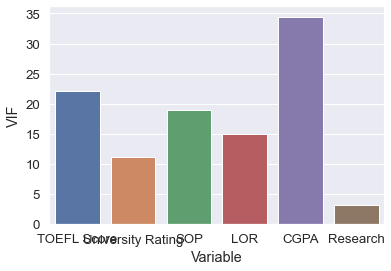

In [283]:
XF = XF.drop('GRE Score', axis=1)
sns.barplot(calculate_vif(XF), x='Variable', y='VIF')

<Axes: xlabel='Variable', ylabel='VIF'>

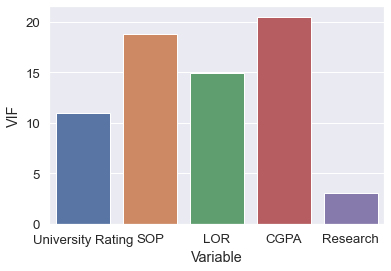

In [284]:
XF = XF.drop('TOEFL Score', axis=1)
sns.barplot(calculate_vif(XF), x='Variable', y='VIF')

<Axes: xlabel='Variable', ylabel='VIF'>

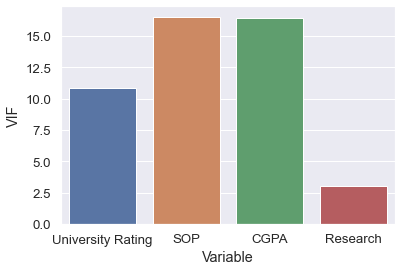

In [285]:
XF = XF.drop('LOR', axis=1)
sns.barplot(calculate_vif(XF), x='Variable', y='VIF')

<Axes: xlabel='Variable', ylabel='VIF'>

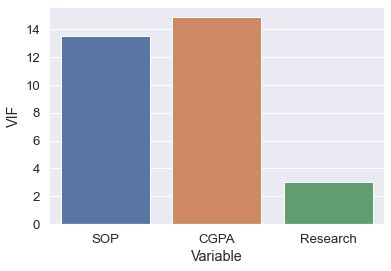

In [286]:
XF = XF.drop('University Rating', axis=1)
sns.barplot(calculate_vif(XF), x='Variable', y='VIF')

<Axes: xlabel='Variable', ylabel='VIF'>

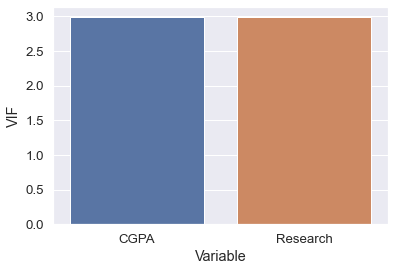

In [287]:
XF = XF.drop('SOP', axis=1)
sns.barplot(calculate_vif(XF), x='Variable', y='VIF')

In [288]:
y = m_df['Chance of Admit']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(XF)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     951.8
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          1.09e-170
Time:                        20:11:23   Log-Likelihood:                 432.73
No. Observations:                 500   AIC:                            -859.5
Df Residuals:                     497   BIC:                            -846.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0360      0.014      2.516      0.012       0.008       0.064
CGPA           0.9397      0.027     34.471      0.000       0.886       0.993
Research       0.0623      0.011      5.861      0.000       0.041       0.083
==============================================================================
Omnibus:                       78.624   Durbin-Watson:                   0.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.186
Skew:                          -0.924   Prob(JB):                     2.20e-31
Kurtosis:                       4.835   Cond. No.                         8.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### model 1: MinMax scaled data model
#### model 2: StandardScale data model
#### model 3: Dropping Column based on VIF

R-squared and Adjusted R-squared:

- model1: R-squared = 0.822, Adjusted R-squared = 0.819
- model2: R-squared = 0.822, Adjusted R-squared = 0.819
- model3: R-squared = 0.793, Adjusted R-squared = 0.792
- Higher values of R-squared and Adjusted R-squared indicate better model fit. In this case, model1 and model2 have higher R-squared values compared to model3.

F-statistic:
- model1: F-statistic = 324.4
- model2: F-statistic = 324.4
- model3: F-statistic = 951.8

The F-statistic tests the overall significance of the regression model. A higher F-statistic is generally better, indicating a more significant relationship between the independent variables and the dependent variable. In this case, model3 has the highest F-statistic.

Coefficient Interpretation:

model1 and model2 have more predictors (independent variables) in the model compared to model3, which only includes 'CGPA' and 'Research'.
The coefficients represent the change in the dependent variable for a one-unit change in the corresponding independent variable.
Overall, the choice of the "better" model depends on the specific goals of your analysis. If model simplicity is preferred, model3 with fewer predictors might be suitable. However, if capturing more features is important, model1 and model2 may be more appropriate. Consideration of other factors such as predictive accuracy, model interpretability, and the context of the analysis is essential in making a decision.

We can also try to transform the columns and check

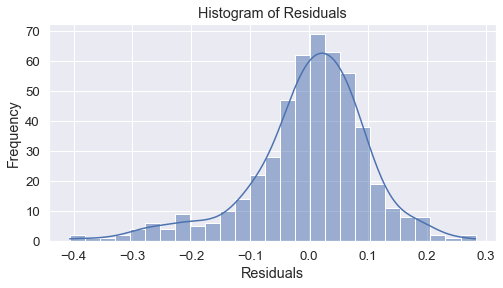

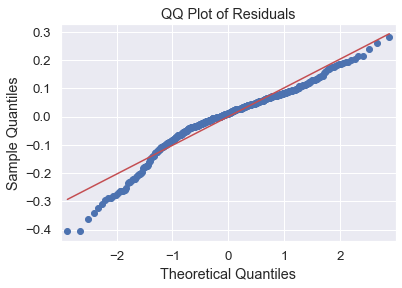

In [292]:
residuals = model.resid

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot QQ plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

Histogram of residuals:

The histogram appears to be roughly symmetrical, which is a good sign. This suggests that the residuals are not skewed in one direction or the other.
There are a few outliers, which are data points that fall far away from the majority of the data. 

QQ plot of residuals:

The points on the QQ plot deviate slightly from the straight line, particularly in the tails. This suggests that the residuals may not be perfectly normally distributed. However, the deviation is not severe, and the normality assumption may still be acceptable for this analysis.

In [293]:
# Get residuals
residuals = model.resid

# Check if the mean of residuals is nearly zero
mean_residuals = residuals.mean()

# Set a threshold for what you consider "nearly zero"
threshold = 1e-10

if abs(mean_residuals) < threshold:
    print(f"Mean of residuals is nearly zero = {abs(mean_residuals)}")
else:
    print(f"Mean of residuals is not nearly zero = {abs(mean_residuals)}")

Mean of residuals is nearly zero = 4.005684672847565e-16


## Test for Heteroskedasticity

In [294]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 0.9102832677168048), ('p-value', 0.7449605558300851)]

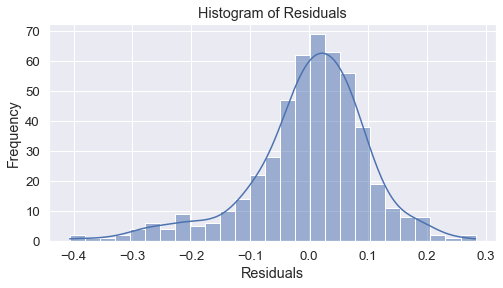

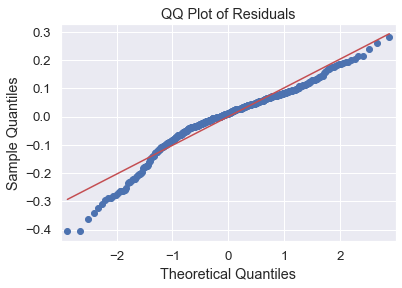

In [181]:
# Get residuals
residuals = model.resid

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot QQ plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

Similar to OLS model

Histogram of residuals:

The histogram appears to be roughly symmetrical, which is a good sign. This suggests that the residuals are not skewed in one direction or the other.
There are a few outliers, which are data points that fall far away from the majority of the data. 

QQ plot of residuals:

The points on the QQ plot deviate slightly from the straight line, particularly in the tails. This suggests that the residuals may not be perfectly normally distributed. However, the deviation is not severe, and the normality assumption may still be acceptable for this analysis.

### For Lasso and Ridge Regression models

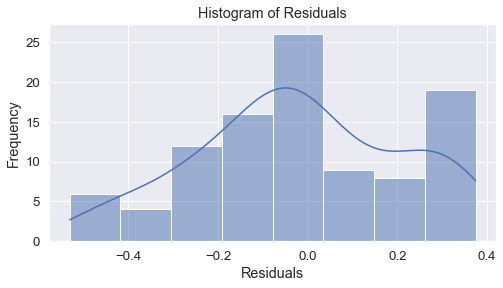

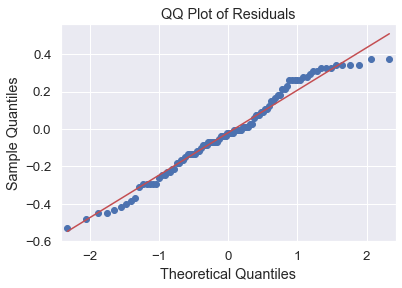

In [322]:
# Get residuals
residuals = y_test - lasso_model.predict(X_test)

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot QQ plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

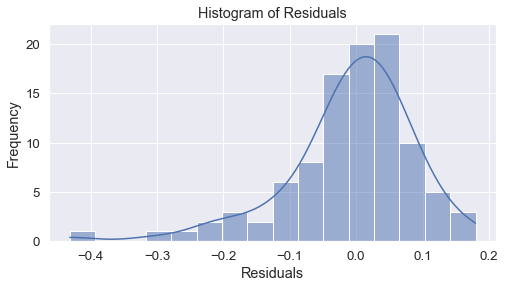

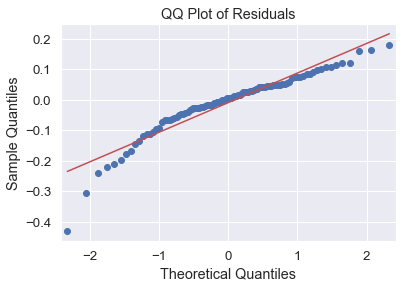

In [317]:
# Get residuals
residuals = y_test - ridge_model.predict(X_test)

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot QQ plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

## Comparing OLS, Ridge and Lasso Regression

In [330]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = m_df.drop('Chance of Admit', axis=1)  # Independent variables
y = m_df['Chance of Admit']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [331]:
# Fit Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)

# Fit Ridge Regression
ridge_model = Ridge(alpha=1)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)

In [332]:
# Metrics for Linear Regression
linear_mae = mean_absolute_error(y_test, y_pred)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
linear_r2 = r2_score(y_test, y_pred)
linear_adj_r2 = 1 - ((1 - linear_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

# Metrics for Lasso Regression
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_adj_r2 = 1 - ((1 - lasso_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

# Metrics for Ridge Regression
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_adj_r2 = 1 - ((1 - ridge_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))


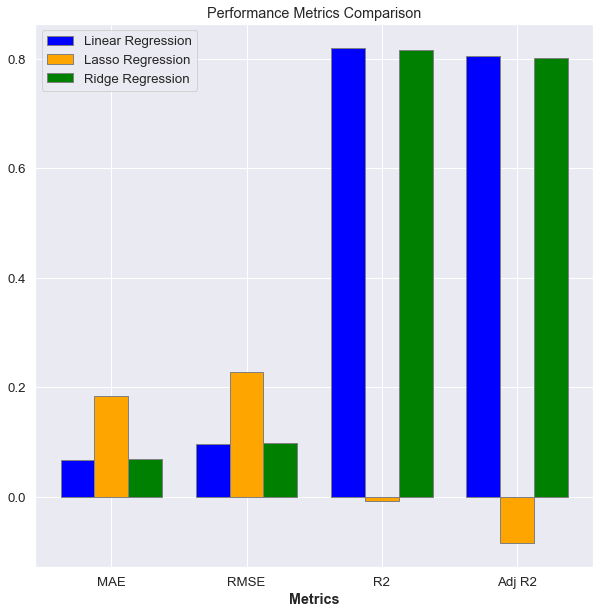

In [333]:
# Plotting
plt.figure(figsize=(10, 10))

metrics_names = ['MAE', 'RMSE', 'R2', 'Adj R2']
linear_metrics = [linear_mae, linear_rmse, linear_r2, linear_adj_r2]
lasso_metrics = [lasso_mae, lasso_rmse, lasso_r2, lasso_adj_r2]
ridge_metrics = [ridge_mae, ridge_rmse, ridge_r2, ridge_adj_r2]

barWidth = 0.25
r1 = np.arange(len(metrics_names))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, linear_metrics, color='blue', width=barWidth, edgecolor='grey', label='Linear Regression')
plt.bar(r2, lasso_metrics, color='orange', width=barWidth, edgecolor='grey', label='Lasso Regression')
plt.bar(r3, ridge_metrics, color='green', width=barWidth, edgecolor='grey', label='Ridge Regression')

plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(metrics_names))], metrics_names)
plt.title('Performance Metrics Comparison')
plt.legend()
plt.show()

Linear Regression, Lasso Regression, and Ridge Regression. Here are the key takeaways:

MAE (Mean Absolute Error) and RMSE (Root Mean Square Error):
- Ridge Regression and Linear are better performing than Lasso Regressions.
- Lasso Regression has higher errors than Ridge and Linear Regression.

R2 and Adjusted R2:
- Ridge Regression shows near-perfect scores for both R2 and Adjusted R2.
- Linear and Lasso Regressions have zero or near-zero scores.

In [342]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = m_df.drop('Chance of Admit', axis=1)  # Independent variables
y = m_df['Chance of Admit']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model using scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = 1 - ((1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))

# Calculate metrics for testing set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = 1 - ((1 - test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

# Print the metrics
print("Training Metrics:")
print(f"MAE: {train_mae}, RMSE: {train_rmse}, R2: {train_r2}, Adj R2: {train_adj_r2}")

print("\nTesting Metrics:")
print(f"MAE: {test_mae}, RMSE: {test_rmse}, R2: {test_r2}, Adj R2: {test_adj_r2}")


Training Metrics:
MAE: 0.06751323906610018, RMSE: 0.09426160076523894, R2: 0.8210671369321554, Adj R2: 0.8178719072345153

Testing Metrics:
MAE: 0.06781373694770418, RMSE: 0.09661250859648116, R2: 0.8188432567829629, Adj R2: 0.8050595915381884


In [344]:
# Fit Ridge Regression
model = Ridge(alpha=1.0) 
model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = 1 - ((1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))

# Calculate metrics for testing set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = 1 - ((1 - test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

# Print the metrics
print("Training Metrics:")
print(f"MAE: {train_mae}, RMSE: {train_rmse}, R2: {train_r2}, Adj R2: {train_adj_r2}")

print("\nTesting Metrics:")
print(f"MAE: {test_mae}, RMSE: {test_rmse}, R2: {test_r2}, Adj R2: {test_adj_r2}")

Training Metrics:
MAE: 0.06765001294598197, RMSE: 0.0947731840962784, R2: 0.8191196318381596, Adj R2: 0.815889625263841

Testing Metrics:
MAE: 0.0688095782432942, RMSE: 0.09732039127875737, R2: 0.8161788497834546, Adj R2: 0.8021924579191522


### Attempts to Improve the Model

Transforming highly correlating columns

We can start with Scores features(CGPA, GRE Score, TOEFL Score) as their correlation is very high(>0.8)

## Transformation 1 : Product of Scoring features

In [463]:
n_df = df.copy()

In [ ]:
n_df['Overall_Score'] = n_df['CGPA']*n_df['GRE Score']*n_df['TOEFL Score']
n_df

In [465]:
n_df.drop(['CGPA', 'GRE Score', 'TOEFL Score'], axis=1, inplace=True)

In [467]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns you want to scale
columns_to_scale = n_df.columns

# Create a MinMaxScaler
scaler = MinMaxScaler()

n_df[columns_to_scale] = scaler.fit_transform(n_df[columns_to_scale])


In [468]:
n_df

,University Rating,SOP,LOR,Research,Chance of Admit,Overall_Score
0,0.75,0.875,0.875,1.0,0.920635,0.898679
1,0.75,0.750,0.875,1.0,0.666667,0.530748
2,0.50,0.500,0.625,1.0,0.603175,0.315534
3,0.50,0.625,0.375,1.0,0.730159,0.528751
4,0.25,0.250,0.500,0.0,0.492063,0.328159
...,...,...,...,...,...,...
495,1.00,0.875,0.750,1.0,0.841270,0.607561
496,1.00,1.000,1.000,1.0,0.984127,0.924848
497,1.00,0.875,1.000,1.0,0.936508,0.873748
498,0.75,0.750,1.000,0.0,0.619048,0.354117


In [469]:
X = n_df.drop('Chance of Admit', axis=1)  # Independent variables
y = n_df['Chance of Admit']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     418.4
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          5.81e-175
Time:                        22:51:39   Log-Likelihood:                 452.84
No. Observations:                 500   AIC:                            -893.7
Df Residuals:                     494   BIC:                            -868.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1345      0.013     10.157      0.000       0.108       0.161
University Rating     0.0400      0.025      1.603      0.110      -0.009       0.089
SOP                   0.0229      0.030      0.769      0.442      -0.036       0.081
LOR                   0.1302      0.027      4.862      0.000       0.078       0.183
Research              0.0399      0.011      3.786      0.000       0.019       0.061
Overall_Score         0.7240      0.034     21.370      0.000       0.657       0.791
==============================================================================
Omnibus:                      101.797   Durbin-Watson:                   0.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.574
Skew:                          -1.109   Prob(JB):                     1.39e-45
Kurtosis:                       5.235   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

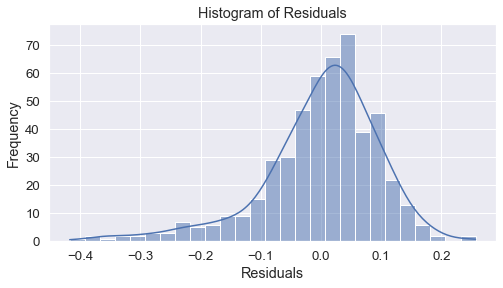

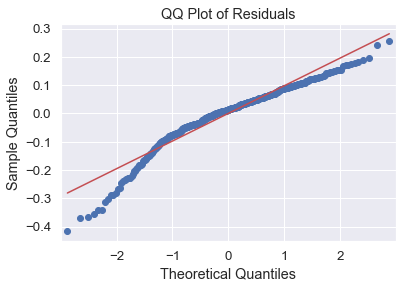

In [471]:
residuals = model.resid

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot QQ plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

<Axes: >

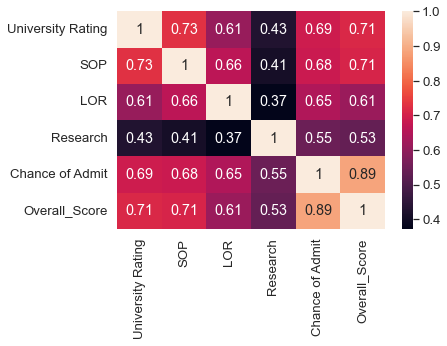

In [472]:
sns.heatmap(n_df.corr(), annot=True)

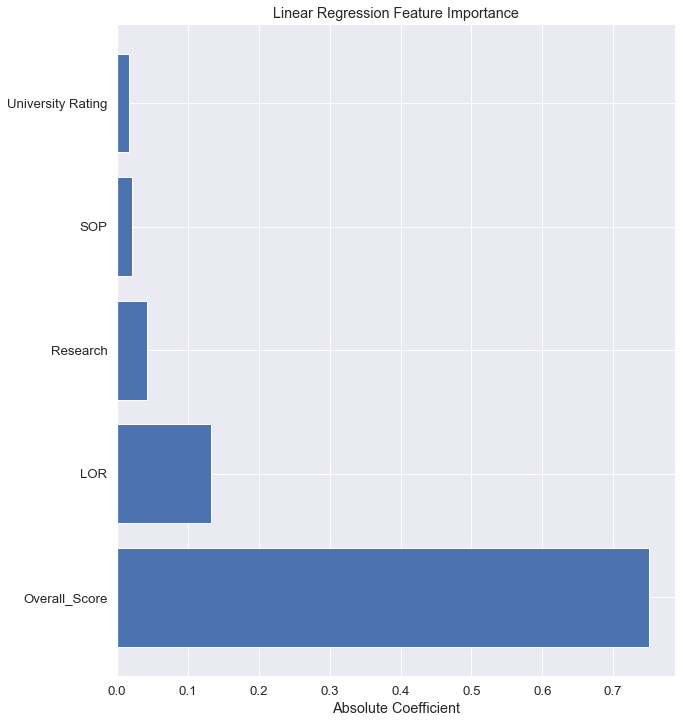

In [473]:
X = n_df.drop('Chance of Admit', axis=1)
y = n_df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_importance_n_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_n_df['Absolute Coefficient'] = np.abs(feature_importance_n_df['Coefficient'])
feature_importance_n_df = feature_importance_n_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 12))
plt.barh(feature_importance_n_df['Feature'], feature_importance_n_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression Feature Importance')
plt.show()


We can check after dropping the 'University rating' and 'SOP' features, as they have very low feature importance 

In [474]:
n_df.drop(['SOP', 'University Rating'], axis =1, inplace=True)

In [475]:
X = n_df.drop('Chance of Admit', axis=1)  # Independent variables
y = n_df['Chance of Admit']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     691.9
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          8.82e-177
Time:                        22:52:49   Log-Likelihood:                 450.46
No. Observations:                 500   AIC:                            -892.9
Df Residuals:                     496   BIC:                            -876.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1362      0.013     10.527      0.000       0.111       0.162
LOR               0.1526      0.024      6.300      0.000       0.105       0.200
Research          0.0412      0.011      3.903      0.000       0.020       0.062
Overall_Score     0.7639      0.028     26.945      0.000       0.708       0.820
==============================================================================
Omnibus:                       96.612   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.854
Skew:                          -1.070   Prob(JB):                     5.94e-42
Kurtosis:                       5.128   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

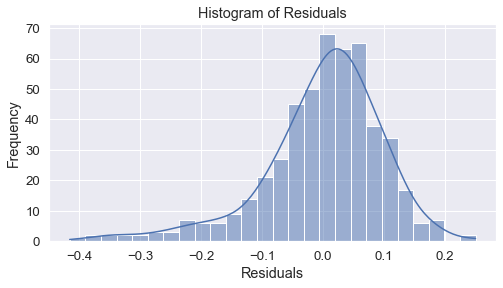

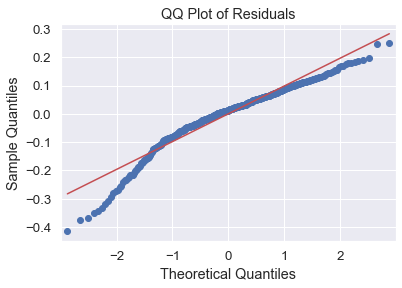

In [476]:
residuals = model.resid

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot QQ plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

In [477]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = n_df.drop('Chance of Admit', axis=1)  # Independent variables
y = n_df['Chance of Admit']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# Predict on the training set
y_train_pred = ridge_model.predict(X_train)

# Predict on the test set
y_test_pred = ridge_model.predict(X_test)

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = 1 - ((1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))

# Calculate metrics for testing set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = 1 - ((1 - test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

# Print the metrics
print("Training Metrics:")
print(f"MAE: {train_mae}, RMSE: {train_rmse}, R2: {train_r2}, Adj R2: {train_adj_r2}")

print("\nTesting Metrics:")
print(f"MAE: {test_mae}, RMSE: {test_rmse}, R2: {test_r2}, Adj R2: {test_adj_r2}")

Training Metrics:
MAE: 0.07198857006768866, RMSE: 0.09825757651301274, R2: 0.8055747858451634, Adj R2: 0.8041018675561116

Testing Metrics:
MAE: 0.07338615319185726, RMSE: 0.10062444095614945, R2: 0.8034854334997529, Adj R2: 0.7973443532966201


A very minor change in the models performance, this also indicates the importance of merit beside other factors for admission

## Transformation 2 : Summation of Scoring features

In [509]:
## Here we will start with scaled df for convenience

u_df = m_df.copy()

u_df['Overall Score'] = u_df['CGPA']+u_df['TOEFL Score']+u_df['GRE Score']


In [510]:

# Select the columns you want to scale
columns_to_scale = u_df.columns

# Create a MinMaxScaler
scaler = MinMaxScaler()

u_df[columns_to_scale] = scaler.fit_transform(u_df[columns_to_scale])

In [511]:
u_df.drop(['CGPA', 'GRE Score', 'TOEFL Score'], axis=1, inplace=True)

<Axes: >

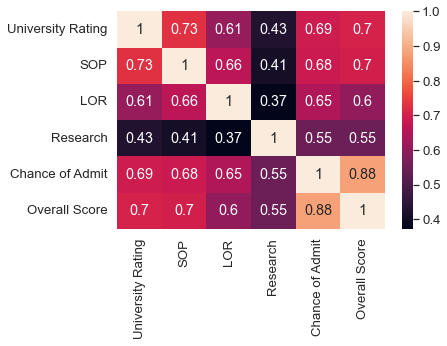

In [512]:
sns.heatmap(u_df.corr(), annot=True)

In [513]:
X = u_df.drop('Chance of Admit', axis=1)  # Independent variables
y = u_df['Chance of Admit']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     403.5
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          7.68e-172
Time:                        23:49:30   Log-Likelihood:                 445.56
No. Observations:                 500   AIC:                            -879.1
Df Residuals:                     494   BIC:                            -853.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1026      0.014      7.484      0.000       0.076       0.129
University Rating     0.0487      0.025      1.929      0.054      -0.001       0.098
SOP                   0.0330      0.030      1.096      0.274      -0.026       0.092
LOR                   0.1396      0.027      5.149      0.000       0.086       0.193
Research              0.0360      0.011      3.343      0.001       0.015       0.057
Overall Score         0.6976      0.034     20.721      0.000       0.631       0.764
==============================================================================
Omnibus:                      105.756   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.763
Skew:                          -1.124   Prob(JB):                     5.74e-50
Kurtosis:                       5.414   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [515]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = u_df.drop('Chance of Admit', axis=1)  # Independent variables
y = u_df['Chance of Admit']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model using scikit-learn
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = 1 - ((1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1))

# Calculate metrics for testing set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = 1 - ((1 - test_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

# Print the metrics
print("Training Metrics:")
print(f"MAE: {train_mae}, RMSE: {train_rmse}, R2: {train_r2}, Adj R2: {train_adj_r2}")

print("\nTesting Metrics:")
print(f"MAE: {test_mae}, RMSE: {test_rmse}, R2: {test_r2}, Adj R2: {test_adj_r2}")


Training Metrics:
MAE: 0.07178853113880584, RMSE: 0.09818680468325854, R2: 0.8058547616650311, Adj R2: 0.8033909896049427

Testing Metrics:
MAE: 0.0751818921673577, RMSE: 0.10435274142358754, R2: 0.788653280016864, Adj R2: 0.7774114332092503


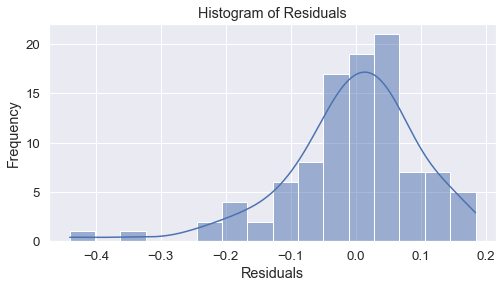

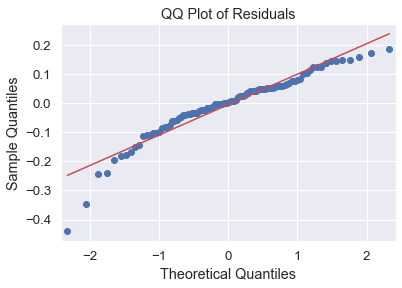

In [516]:
residuals = y_test - model.predict(X_test)

# Plot histogram
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot QQ plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

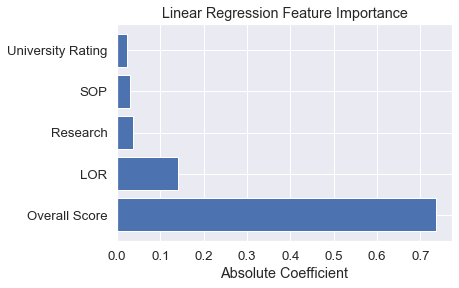

In [517]:
X = u_df.drop('Chance of Admit', axis=1)
y = u_df['Chance of Admit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
feature_importance_n_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_n_df['Absolute Coefficient'] = np.abs(feature_importance_n_df['Coefficient'])
feature_importance_n_df = feature_importance_n_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting the feature importance

plt.barh(feature_importance_n_df['Feature'], feature_importance_n_df['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Linear Regression Feature Importance')
plt.show()

Lets drop SOP, U rating and Research columns

In [518]:
u_df.drop(['SOP', 'University Rating', 'Research'], axis=1, inplace=True)

In [519]:
X = u_df.drop('Chance of Admit', axis=1)  # Independent variables
y = u_df['Chance of Admit']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     966.3
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          5.48e-172
Time:                        23:49:46   Log-Likelihood:                 435.74
No. Observations:                 500   AIC:                            -865.5
Df Residuals:                     497   BIC:                            -852.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0989      0.014      7.278      0.000       0.072       0.126
LOR               0.1760      0.025      7.156      0.000       0.128       0.224
Overall Score     0.7900      0.026     30.343      0.000       0.739       0.841
==============================================================================
Omnibus:                      104.322   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.328
Skew:                          -1.093   Prob(JB):                     3.55e-51
Kurtosis:                       5.524   Cond. No.                         9.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We observed that by transforming the columns that were high multicolinearity, there is not much boost in performance, in fact it dropped, hence  we decided to keep them as it is by the philosphy of Occum's razor

Significance of Predictor Variables:

- The predictors include 'GRE Score,' 'TOEFL Score,' 'University Rating,' 'SOP,' 'LOR,' 'CGPA,' and 'Research.'
- The significance of each predictor is determined by the p-value. A low p-value (typically < 0.05) suggests that the predictor is statistically significant.
- The predictors 'CGPA' and 'Research' show significant impact on 'Chance of Admit' across models.
'Research' exhibits consistent significance, indicating that having research experience positively influences the chance of admission.

Additional Data Sources for Model Improvement:

- The current model relies heavily on academic metrics ('GRE Score,' 'TOEFL Score,' 'CGPA'), 'University Rating,' 'SOP,' 'LOR,' and 'Research.', and merit comes as the strongest contributer for Chance of admission.
- Additional data sources such as extracurricular activities, work experience, and personal statements could enhance the model.
- Gathering information on relevant projects, and industry certifications might contribute valuable insights.

Model Implementation in the Real World:

The model can be implemented in real-world scenarios, such as university admissions offices, to aid in decision-making.
Continuous monitoring and periodic updates of the model are crucial to adapt to changing admission criteria and applicant profiles.

Potential Business Benefits from Improving the Model:

- Enhanced predictive accuracy could result in more informed admission decisions, increasing the likelihood of selecting candidates who are more likely to succeed academically.
- Improved efficiency in the admissions process by automating initial screening based on the predictive model.
- Better allocation of resources, scholarships, and financial aid based on a more accurate understanding of factors influencing admission.
- Achieving an excellent solution involves a continuous feedback loop involving model evaluation, refinement, and adaptation to evolving data and objectives. Incorporating diverse data sources and considering the broader impact of the model on decision-making processes can lead to a more robust and beneficial solution in practical applications.